# Laboratorium 3 - Singular Value Decomposition

##### Aleksandra Mazur

## Zadanie 1 Przekształcenie sfery w elipsoidę

#### 1.

Wykorzystując równanie parametryczne narysowano sferę jednostkową w 3D

\begin{equation}
V = 
  \begin{bmatrix}
    cos(s)sin(t) \\
    sin(s)sin(t) \\
    cos(t)
  \end{bmatrix}
  \label{eq:aeqn}
\end{equation}

\begin{equation}
s \in [0, 2\pi] \\
t \in [0, \pi]
\end{equation}

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

In [18]:
s = np.linspace(0, 2 * np.pi, 100)
t = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(s), np.sin(t))
y = np.outer(np.sin(s), np.sin(t))
z = np.outer(np.ones(np.size(s)), np.cos(t))

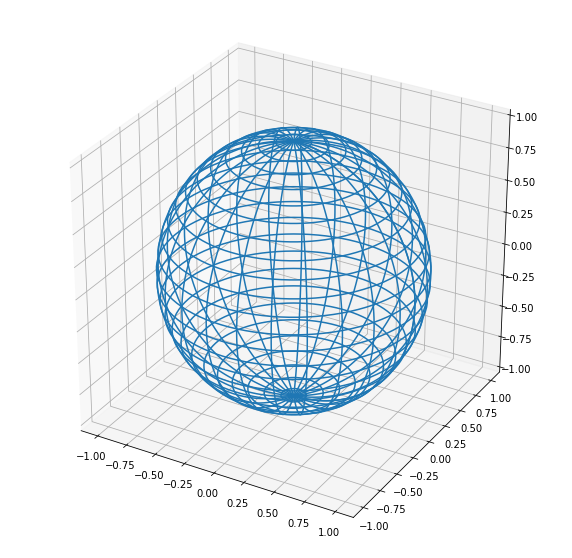

In [36]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')
ax.plot_wireframe(x, y, z, rstride = 4, cstride = 4)
plt.show()

Jak widać otrzymaliśmy sferę o środku w punkcie (0,0,0) i promieniu 1.

#### 2.

Wygenerowano 3 rózne macierze A1,A2,A3 (R<sup>3x3</sup>).

In [8]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

In [9]:
A1, A2, A3

(array([[0.36102388, 0.55039705, 0.36161565],
        [0.85258051, 0.3822438 , 0.92426963],
        [0.62210342, 0.40720063, 0.10249733]]),
 array([[0.02591992, 0.90077548, 0.51009976],
        [0.56579991, 0.43681154, 0.76688651],
        [0.01260937, 0.87126435, 0.28584518]]),
 array([[0.00885917, 0.95497694, 0.86884607],
        [0.83667987, 0.58421013, 0.53915821],
        [0.45044457, 0.33499362, 0.92939763]]))

Za pomocą powyższych macierzy przekształcono sfery w elipsoidy.

In [39]:
S, T = np.meshgrid(s, t)
v = [lambda s, t : np.cos(s)*np.sin(t),
     lambda s, t : np.sin(s)*np.sin(t),
     lambda s, t : np.cos(t)]

X = v[0](S, T).flatten()
Y = v[1](S, T).flatten()
Z = v[2](S, T).flatten()

In [40]:
def plot_3D(x, y, z):
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    plt.show()

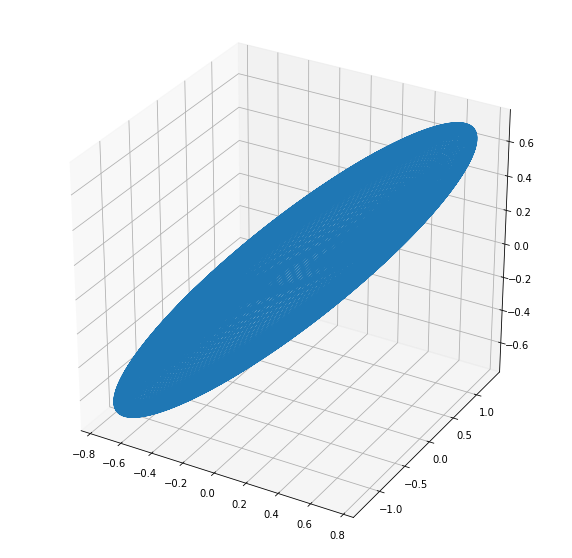

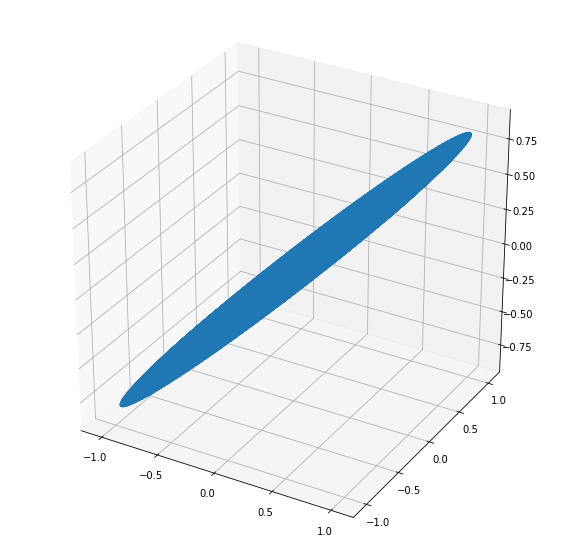

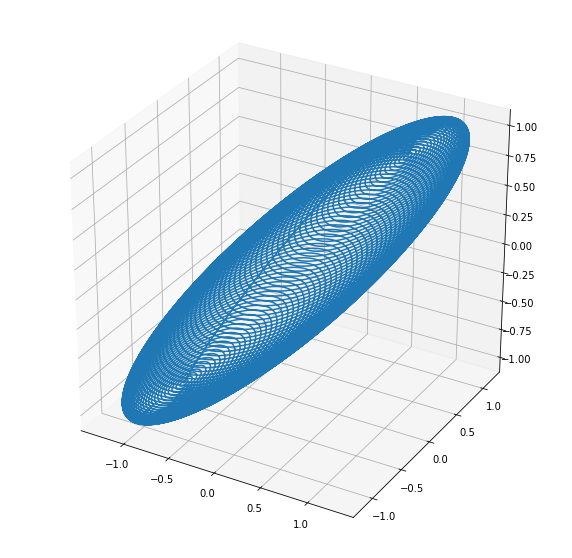

In [41]:
S = np.row_stack([X, Y, Z])

P1 = A1 @ S
P2 = A2 @ S
P3 = A3 @ S

plot_3D(P1[0], P1[1], P1[2])
plot_3D(P2[0], P2[1], P2[2])
plot_3D(P3[0], P3[1], P3[2])

#### 3.

Dla każdej ze stworzonych macierzy dokonano rozkładu według wartosci osobliwych (SVD).

In [43]:
U1, S1, Vh1 = np.linalg.svd(A1)
U2, S2, Vh2 = np.linalg.svd(A2)
U3, S3, Vh3 = np.linalg.svd(A3)